# **ANALYSING THE EMPLOYEE ATTRITION GIVEN THE DATASET FROM KAGGLE**

## IMPORTING PYTHON PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

## IMPORTING DATA TABLE

In [2]:
data = pd.read_csv("hr_attrition_data.csv")

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
data.shape

(1470, 35)

### Explanation of Columns

**1. Age:** Age of employee <br>
**2. Attrition:** Indicates if the employee has left the company <br>
**3. Business Travel:** Frequency of business travel <br>
**4. Daily Rate:** The daily pay rate of the employee <br>
**5. Department:** The department the employee works in <br>
**6. Distance From Home:** The distance (in miles) the employee lives from work <br>
**7. Education:** Employee's level of education <br>
**8. Education Field:** The field of study of the employee <br>
**9. Employee Count:** Count of employees in the same position or department <br>
**10. Employee Number:** Unique identifier for each employee <br>
**11. Environment Satisfaction:** Satisfaction level with the work environment (on a scale, typically 1-4) <br>
**12. Gender:** Gender of the employee <br>
**13. Hourly Rate:** The pay rate of the employee on an hourly basis <br>
**14. Job Involvement:** Employee’s involvement in their job <br>
**15. Job Level:** Level of the employee’s position within the organization <br>
**16. Job Role:** The specific job title or role of the employee <br>
**17. Job Satisfaction:** Employee's satisfaction with their job <br>
**18. Marital Status:** Marital status of the employee <br>
**19. Monthly Income:** The employee's monthly income <br>
**20. Monthly Rate:** The monthly pay rate for the employee <br>
**21. Num Companies Worked:** The number of different companies the employee has worked for <br>
**22. Over 18:** Indicates if the employee is over 18 years old <br>
**23. Over Time:** Indicates if the employee works overtime <br>
**24. Percent Salary Hike:** The percentage increase in salary <br>
**25. Performance Rating:** Employee’s performance rating <br>
**26. Relationship Satisfaction:** Satisfaction level with workplace relationships <br>
**27. Standard Hours:** Standard working hours for the employee <br>
**28. Stock Option Level:** Level of stock options available to the employee <br>
**29. Total Working Years:** Total years of working experience of the employee <br>
**30. Training Times Last Year:** Number of training sessions attended during the last year <br>
**31. Work-Life Balance:** Employee's perception of their work-life balance <br>
**32. Years At Company:** Number of years the employee has been with the company <br>
**33. Years In Current Role:** Number of years the employee has been in their current position <br>
**34. Years Since Last Promotion:** Number of years since the employee's last promotion <br>
**35. Years With Current Manager:** Number of years the employee has been with their current manager <br>



## CHECKING FOR MISSING VALUES 

In [7]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

***NOTE: Shows that there are no missing values in the dataset***

## TABLE INFORMATION - Exploring the data types

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## EMPLOYEE ATTRTITION ANALYSIS

PROBLEM STATEMENT: <br>
What are the factors that are most associated with emplyee attrition (that is, what factors decides whether the employee leave the company)?

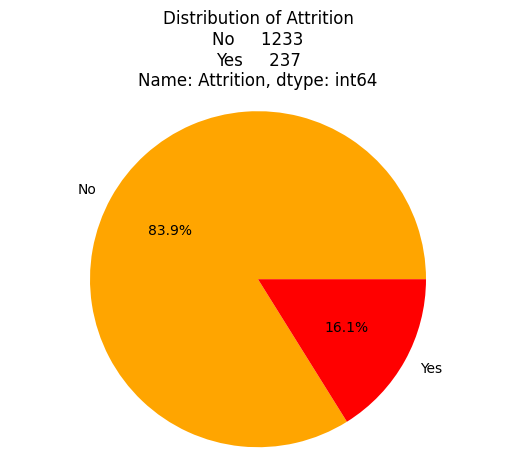

In [9]:
attrition = data["Attrition"].value_counts()
attrition.name = "Attrition"


# Explicit color order matching the labels ('No', 'Yes')
colors = ["orange", "red"] 
palette = {"No": "orange", "Yes": "red"}  # assign colors by label

# Pie chart
plt.pie(attrition, labels=attrition.index, autopct = '%1.1f%%', colors=colors)

# Equal aspect ratio ensures that pe is drawn as a circle
plt.axis('equal')

# Title
plt.title(f"Distribution of {attrition}")

# Show
plt.show()

### **COUNT BASED ON ATTRITION**
**Attritioned employees:** 237, which is 16.1% of the total employees <br>
**Active employees:** 1233, which is 83.9% of the total employees 

### **VARIABLE SELECTION**

Variables for a regression model are selected based on a combination of domain knowledge and statistical analysis methods.
For the given problem statement, we will primarily use "Subject Matter Knowledge", and "Correlation anaysis"

The main approaches for variable selection include:

### 1. Subject Matter Knowledge
- Variables known to affect the outcome, based on previous research or theory, are included.

### 2. Univariate Analysis
- Each variable's individual relationship with the outcome is tested (using p-values, correlation, etc.). Variables showing significant association may be considered for inclusion.

### 3. Formal Statistical Selection Methods
- **Forward Selection:** Start with no variables and add them one at a time based on significance.
- **Backward Elimination:** Start with all candidate variables and remove the least significant one by one.
- **Stepwise Selection:** Combine forward selection and backward elimination.
- **All Subsets Regression:** Evaluate all combinations but is computationally intensive for many variables.

### 4. Information Criteria
- Techniques like Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) evaluate models by balancing fit and complexity—lower is better.

### 5. Multicollinearity and Redundancy
- Highly correlated predictors are avoided to reduce redundancy and instability in estimations.

### 6. Retention of Confounders
- Variables not significant individually but which, when removed, substantially change the estimates of other variables, are retained as confounders.

### 7. Iterative Model Building
- The process is often iterative: variables are added or removed and the model is repeatedly checked for fit, parsimony, and predictive accuracy.

Proper variable selection helps build a model that is both interpretable and effective, balancing simplicity with explanatory or predictive power. 

### **Attrition against Other Variables**

Investigating how the variables affect the employees who stayed versus those who left.

Some of the key variables to focus on:
1. Age: Are younger or older employees more likely to leave?
2. Business Travel: Does frequent travel lead to attrition?
3. Department: Are specific departments affected by attrition?
4. Distance From Home: Are employees who live far from work more likely to leave?
5. Education: Does the level of education influence attrition?
6. Job Satisfaction: Do employees with lower job satisfaction tend to leave?
7. Marital Status: Does marital status play a role (e.g., are single employees more likely to leave)?
8. Monthly Income: Is there a connection between income and quitting?
9. Job Role: Is a particular job role prone to attrition?
10. Over Time: Do employees working overtime have a higher chance of leaving?
11. Work-Life Balance: Are employees with poor work-life balance more likely to leave?

**1. Age: Are younger or older employees more likely to leave?** <br>
Hypothesis: Younger employees tend to leave for better career opportunities



In [10]:
age_comparison = data.groupby('Attrition')['Age'].mean()
print(age_comparison)

Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64


***INSIGHT*** <br>
The average age of employees who quit the company is 33.6 years <br>
The average age of employees who are still with the company is 37.5 years 

**2. Business Travel: Does frequent travel lead to attrition?** <br>
Hypothesis: Employees who travel frequently for business might be more likely to leave due to travel fatigue or poor work-life balance.

In [11]:
travel_comparison = data.groupby(['Attrition', 'BusinessTravel']).size().unstack()
print(travel_comparison)

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
No                     138                208            887
Yes                     12                 69            156


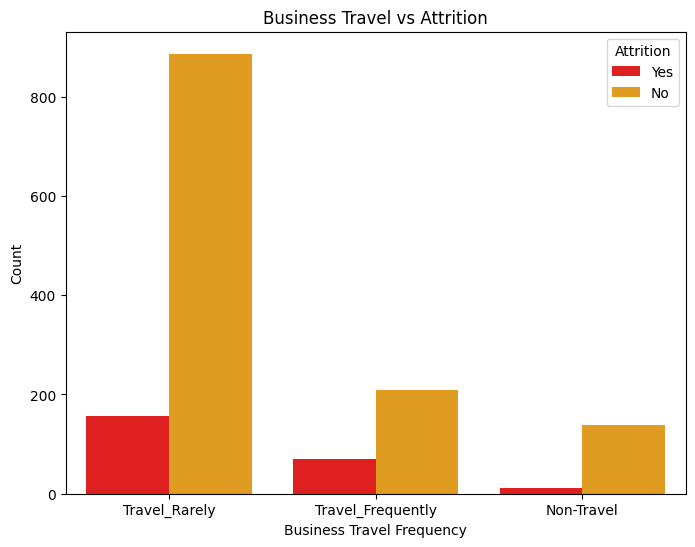

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(x='BusinessTravel', hue='Attrition', data=data, palette=palette)
plt.title('Business Travel vs Attrition')
plt.xlabel('Business Travel Frequency')
plt.ylabel('Count')
plt.show()

***INSIGHT*** <br>
Based on the graph, it is seen that there is no positive relationship between Business Travel and Attrition. 
Though it looks like, people with rare opportunity to travel, tend to quit more.

**3. Department: Are specific departments affected by attrition?** <br>
Hypothesis: Are departments like R&D and Sales affected more by Attrition ?  

In [13]:
department = data.groupby(['Attrition', 'Department']).size().unstack()
print(department)

Department  Human Resources  Research & Development  Sales
Attrition                                                 
No                       51                     828    354
Yes                      12                     133     92


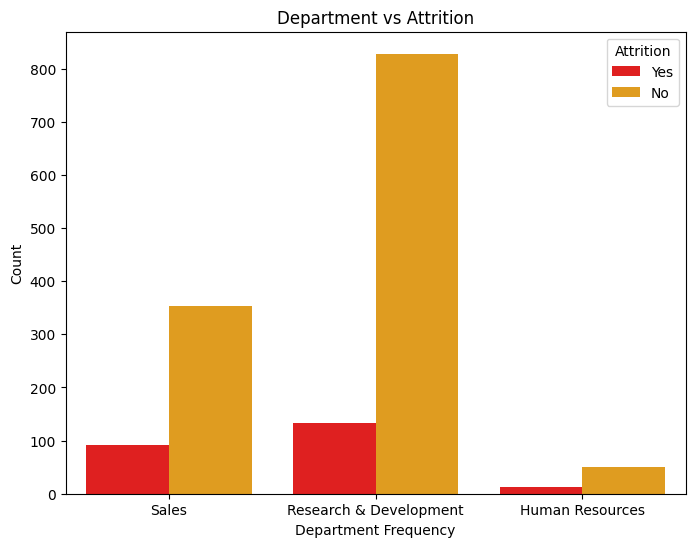

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(x='Department', hue='Attrition', data=data, palette=palette)
plt.title('Department vs Attrition')
plt.xlabel('Department Frequency')
plt.ylabel('Count')
plt.show()

***INSIGHT*** <br>
More attrition in Departments R&D and Sales

**4. Distance From Home: Are employees who live far from work more likely to leave?** <br>
Hypothesis: Employees who live far from work are most likely to quit

DistanceFromHome   1    2   3   4   5   6   7   8   9   10  11  12  13  14  \
Attrition                                                                    
No                182  183  70  55  55  52  73  70  67  75  25  14  13  17   
Yes                26   28  14   9  10   7  11  10  18  11   4   6   6   4   

DistanceFromHome  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  
Attrition                                                                     
No                21  25  15  22  19  21  15  13  22  16  19  22   9  21  22  
Yes                5   7   5   4   3   4   3   6   5  12   6   3   3   2   5  


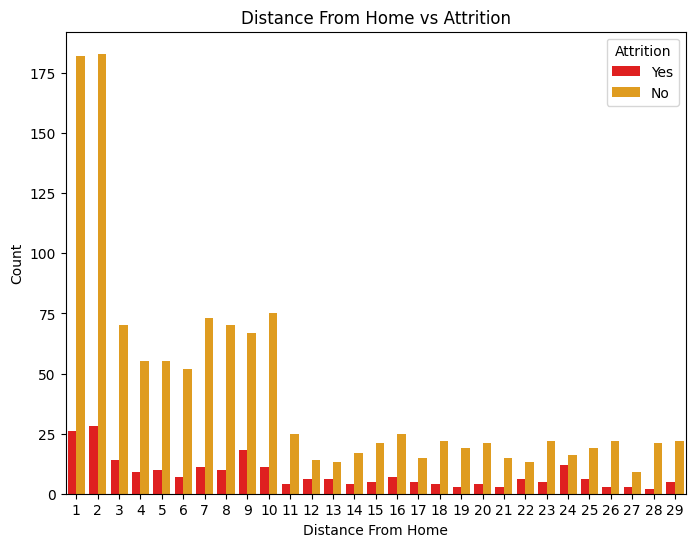

In [15]:
distance = data.groupby(['Attrition', 'DistanceFromHome']).size().unstack()
print(distance)

plt.figure(figsize=(8,6))
sns.countplot(x='DistanceFromHome', hue='Attrition', data=data, palette=palette)
plt.title('Distance From Home vs Attrition')
plt.xlabel('Distance From Home')
plt.ylabel('Count')
plt.show()

***INSIGHT*** <br>
The observations looks otherwise. 
People who are closer to office seem to quir more. 

**5. Education: Does the level of education influence attrition?** <br>
Hypothesis:  High skilled workes are more likely to leave for better opprtunites

Education    1    2    3    4   5
Attrition                        
No         139  238  473  340  43
Yes         31   44   99   58   5


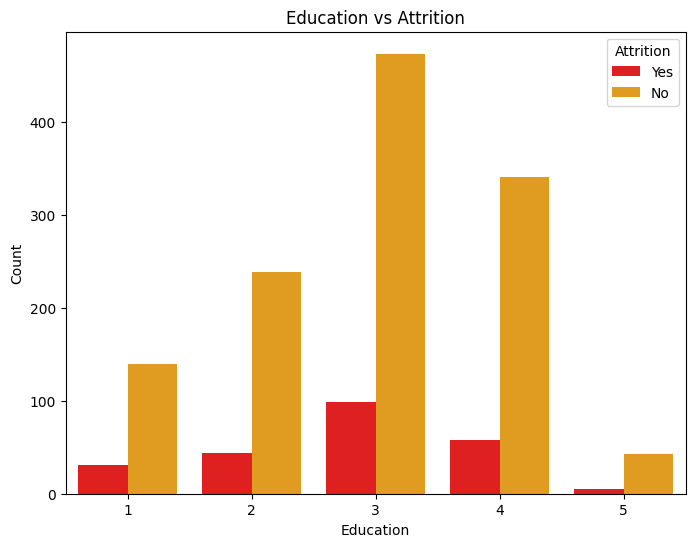

In [16]:
education = data.groupby(['Attrition','Education']).size().unstack()
print(education)

plt.figure(figsize=(8,6))
sns.countplot(x='Education', hue='Attrition', data=data, palette=palette, hue_order=["Yes", "No"])
plt.title('Education vs Attrition')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

***INSIGHT*** <br>
Observations reveal that those employees with very low education, or very high education tend to stay with the job
Those with median level of educaction are the ones who leave.

**6. Job Satisfaction: Do employees with lower job satisfaction tend to leave?** <br>
Hypothesis: Employees with lower job satisfaction leave

JobSatisfaction    1    2    3    4
Attrition                          
No               223  234  369  407
Yes               66   46   73   52


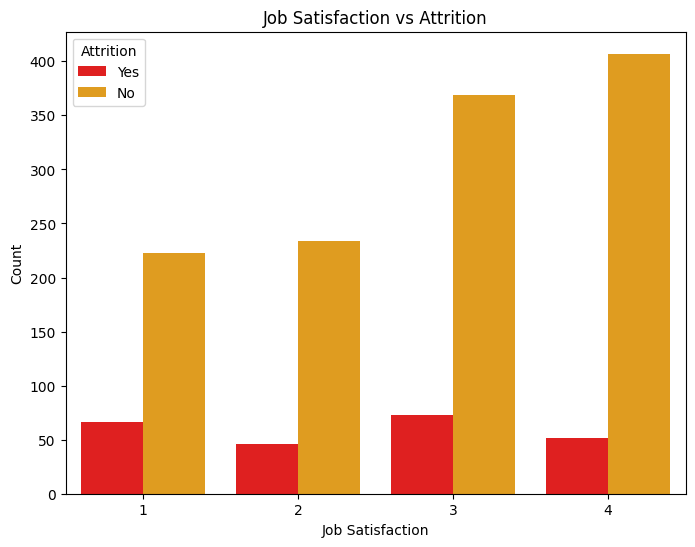

In [17]:
jobsatisfaction = data.groupby(['Attrition','JobSatisfaction']).size().unstack()
print(jobsatisfaction)

plt.figure(figsize=(8,6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=data, palette=palette, hue_order=["Yes", "No"])
plt.title('Job Satisfaction vs Attrition')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.show()

***INSIGHT*** <br>
There isn't a pattern with respect to job satisfaction and attrition

**7. Marital Status: Does marital status play a role (e.g., are single employees more likely to leave)?** <br>
Hypothesis:  Single employees tend to quit more, because they are more flexible to shift roles or relocate

MaritalStatus  Divorced  Married  Single
Attrition                               
No                  294      589     350
Yes                  33       84     120


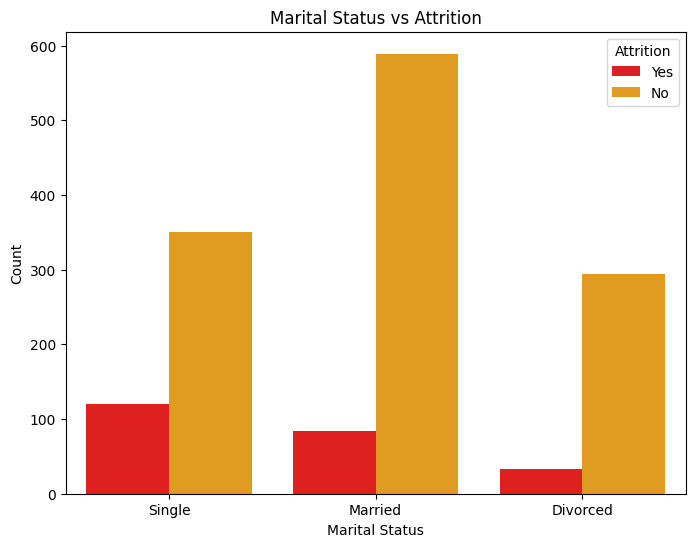

In [18]:
maritalstatus = data.groupby(['Attrition','MaritalStatus']).size().unstack()
print(maritalstatus)

plt.figure(figsize=(8,6))
sns.countplot(x='MaritalStatus', hue='Attrition', data=data, palette=palette)
plt.title('Marital Status vs Attrition')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

Observing the same graph in percentages:

Attrition            Yes         No
MaritalStatus                      
Single         25.531915  74.468085
Married        12.481426  87.518574
Divorced       10.091743  89.908257


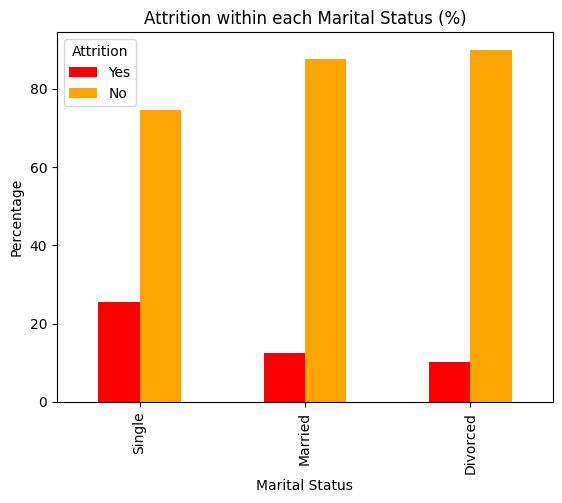

In [19]:
# Convert to percentages by row (marital status)
maritalstatus_2 = data.groupby(['MaritalStatus', 'Attrition']).size().unstack()
maritalstatus_percent_by_status = maritalstatus_2.div(maritalstatus_2.sum(axis=1), axis=0) * 100
maritalstatus_percent_by_status = maritalstatus_percent_by_status[["Yes", "No"]] 
maritalstatus_percent_by_status = maritalstatus_percent_by_status.loc[["Single", "Married", "Divorced"]] 
print(maritalstatus_percent_by_status) 

# Plot as a bar chart
maritalstatus_percent_by_status.plot(kind='bar', color=["red", "orange"])
plt.title('Attrition within each Marital Status (%)')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.legend(title='Attrition')
plt.show()

Observing both the graphs side by side:

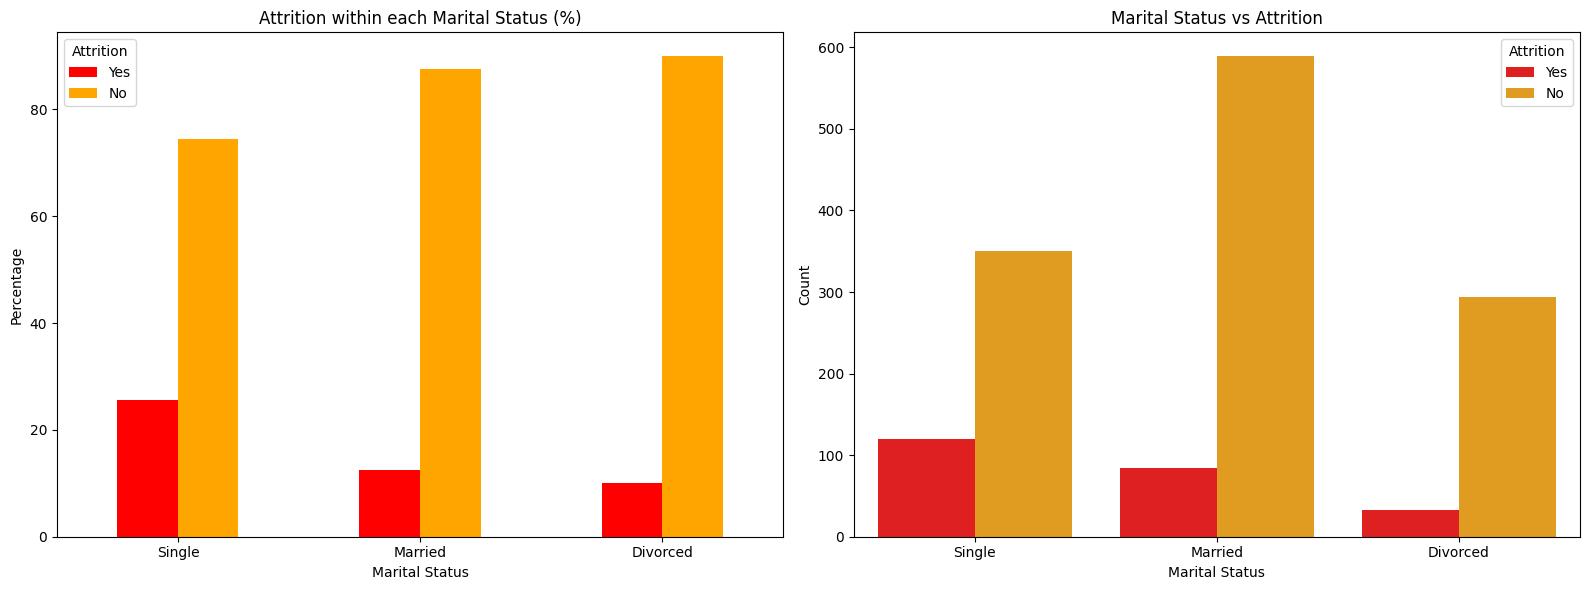

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  

# Bar chart: Marital Status (percentage) vs Attrition
maritalstatus_percent_by_status.plot(kind='bar', color=["red" , "orange"], ax=axes[0])
axes[0].set_title('Attrition within each Marital Status (%)')
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Percentage')
axes[0].legend(title='Attrition') 
axes[0].tick_params(axis='x', labelrotation=0)

# Countplot: Marital Status vs Attrition
palette = {"No": "orange", "Yes": "red"}
sns.countplot(x='MaritalStatus', hue='Attrition', data=data, ax=axes[1], palette=palette)
axes[1].set_title('Marital Status vs Attrition')
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Count')
 
plt.tight_layout()
plt.show()


***INSIGHT*** <br>
The % of single people who drop out are higher

**8. Monthly Income: Is there a connection between income and quitting?** <br>
Hypothesis:  Less paid workers leave

C:\Users\DELL\AppData\Local\Temp\ipykernel_12544\2269082560.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=data, palette=palette)


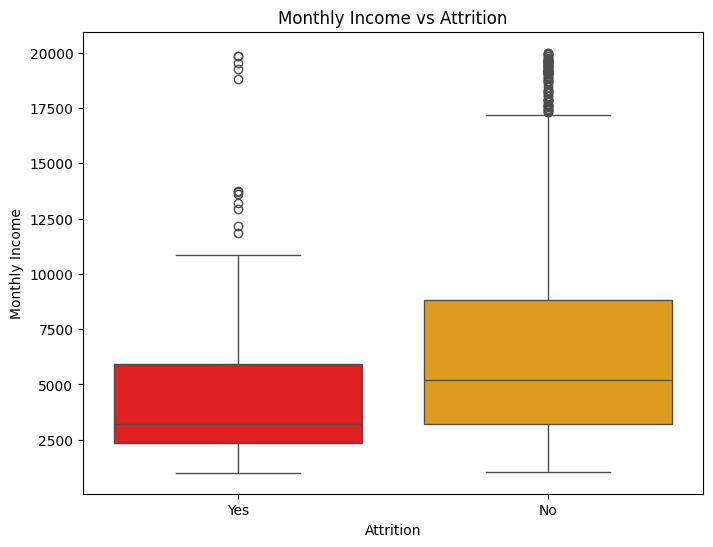

In [21]:
monthlyincome = data.groupby(['Attrition', 'MonthlyIncome']).size().unstack() 

plt.figure(figsize=(8,6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data, palette=palette)
plt.title('Monthly Income vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show() 
 

***INSIGHT*** <br>
Lesser income workers are more likely to leave

**9. Job Role: Is a particular job role prone to attrition?** <br>
Hypothesis:  Roles like have more Attrition

Attrition                   No  Yes
JobRole                            
Healthcare Representative  122    9
Human Resources             40   12
Laboratory Technician      197   62
Manager                     97    5
Manufacturing Director     135   10
Research Director           78    2
Research Scientist         245   47
Sales Executive            269   57
Sales Representative        50   33


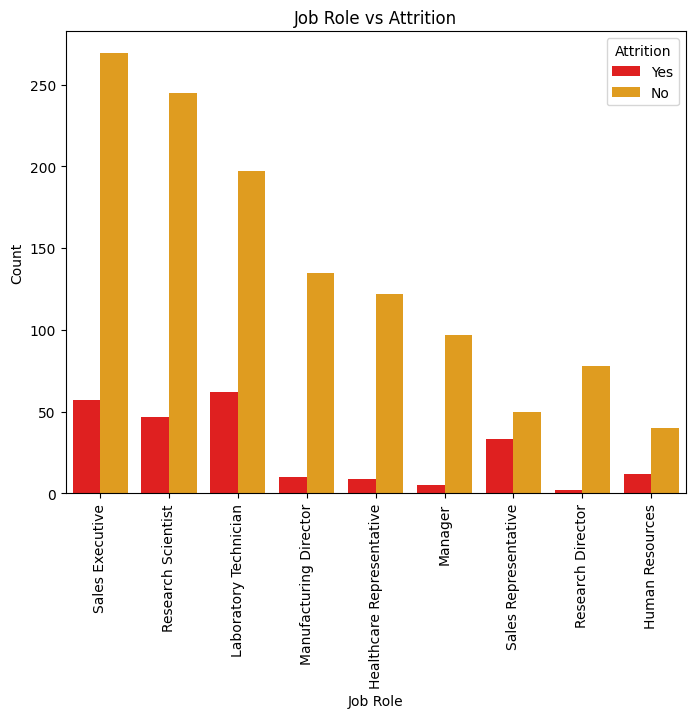

In [22]:
jobrole = data.groupby(['JobRole', 'Attrition']).size().unstack()
print(jobrole)

plt.figure(figsize=(8,6))
sns.countplot(x='JobRole', hue='Attrition', data=data, palette=palette)
plt.title('Job Role vs Attrition')
plt.xlabel('Job Role')
plt.xticks(rotation=90) 
plt.ylabel('Count')
plt.show()

***INSIGHT*** <br>
More exits in the job roles "Sales Executive", "Laboratory Technician" and "Research Scientist"

**10. Over Time: Do employees working overtime have a higher chance of leaving?** <br>
Hypothesis:  Over time leads to attrition

Attrition   No  Yes
OverTime           
No         944  110
Yes        289  127


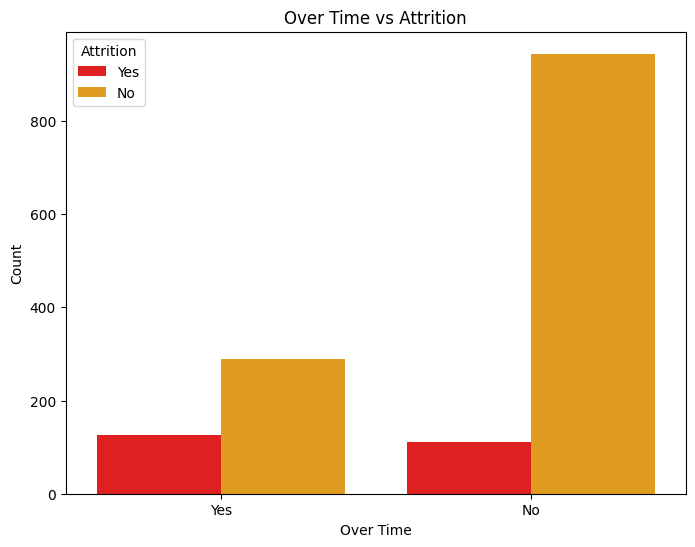

In [23]:
overtime = data.groupby(['OverTime', 'Attrition']).size().unstack()
print(overtime)

plt.figure(figsize=(8,6))
sns.countplot(x='OverTime', hue='Attrition', data=data, palette=palette)
plt.title('Over Time vs Attrition')
plt.xlabel('Over Time')
plt.ylabel('Count')
plt.show()

***INSIGHT*** <br>
Workers working over time are more like to quit

**11. Work-Life Balance: Are employees with poor work-life balance more likely to leave?** <br>
Hypothesis: Employees with poor work-life balance quit 

Attrition         No  Yes
WorkLifeBalance          
1                 55   25
2                286   58
3                766  127
4                126   27


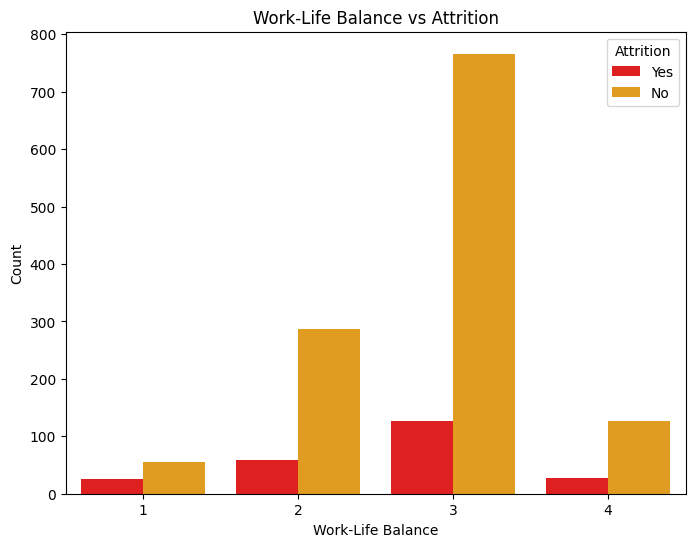

In [24]:
worklifebalance = data.groupby(['WorkLifeBalance', 'Attrition']).size().unstack()
print(worklifebalance)

plt.figure(figsize=(8,6))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=data, palette=palette)
plt.title('Work-Life Balance vs Attrition')
plt.xlabel('Work-Life Balance')
plt.ylabel('Count')
plt.show()

***INSIGHT*** <br>
No specific pattern as such

# CORRELATION ANALYSIS
To explore the relationship between Attrition and each numeric variable in the data, to understand strong predictions

In [25]:
print(data['Attrition'].dtype)

object


In [26]:
print(data['Attrition'].unique())

['Yes' 'No']


In [27]:
# Converting 'Attrition' and 'OverTime' columns to binary (0 for No, 1 for Yes)

data['Attrition'] = data['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)
data['OverTime'] = data['OverTime'].apply(lambda x:1 if x == 'Yes' else 0)

# Converting 'MaritalStatus' to binary (1 for single, 0 for others)
data['MaritalStatus'] = data['MaritalStatus'].apply(lambda x: 1 if x == 'Single' else 0)


In [28]:
print(data['Attrition'].unique())

[1 0]


In [29]:
print(data['Attrition'].mean())

0.16122448979591836


In [30]:
print(data.select_dtypes(exclude=['number']).columns)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'Over18'],
      dtype='object')


In [31]:
# correlation= data.corr()['Attrition']
correlation = data.select_dtypes(include=['number']).corr()['Attrition']

In [32]:
print(correlation)

Age                        -0.159205
Attrition                   1.000000
DailyRate                  -0.056652
DistanceFromHome            0.077924
Education                  -0.031373
EmployeeCount                    NaN
EmployeeNumber             -0.010577
EnvironmentSatisfaction    -0.103369
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobSatisfaction            -0.103481
MaritalStatus               0.175419
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
OverTime                    0.246118
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StandardHours                    NaN
StockOptionLevel           -0.137145
TotalWorkingYears          -0.171063
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
YearsAtCompany             -0.134392
YearsInCurrentRole         -0.160545
Y

## Key Insights from the Correlation Results:

**1. Age (-0.16):** There is a weak negative correlation, meaning younger employees are slightly more likely to leave than older ones <br>
**2. DailyRate (-0.06):** Almost no correlation between the employee's daily rate and attrition. It doesn't significantly impact whether an employee stays or leaves <br>
**3. Distance From Home (0.08):** cDistance doesn't really affect the Attrition <br>
**4. Education (-0.03):** Almost no correlation between education level and attrition; education doesn't influence Attrition <br>
**5. Employee Count:** No data or correlation available  <br> 
**6. Number of Employees (-0.01):** No significant correlation <br>
**7. Environment Satisfaction (-0.10):** Weak negative correlation. Employees with lower satisfaction in their work environment are slightly more likely to leave <br>
**8. Hourly Rate (-0.01):** No significant correlation <br>
**9. Job Involvement (-0.13):** Weak negative correlation. Employees with lower job involvement are slightly more likely to leave <br>
**10. Job Level (-0.17):** Weak negative correlation. Employees at lower job levels are more likely to leave than those at higher levels <br>
**11. Job Satisfaction (-0.10):** Weak negative correlation. Employees with lower job satisfaction are slightly more likely to leave <br>
**12. Marital Status (0.18):** Weak positive correlation. Single employees tend to leave more often compared to married ones <br>
**13. MonthlyIncome (-0.16):** Weak negative correlation. Employees with lower monthly income are slightly more likely to leave <br>
**14. Number of Companies Worked (0.04):** No significant correlation <br>
**15. Over Time (0.25):** Moderate positive correlation. Employees who work overtime are more likely to leave, making this one of the stronger predictors of attrition <br>
**16. PercentSalaryHike (-0.01):** No significant correlation <br>
**17. PerformanceRating (0.003):** No significant correlation <br>
**18. Relationship Satisfaction (-0.05):**  Almost no correlation, employees with lower satisfaction might be slightly more likely to leave, but the effect is minimal <br>
**19. StandardHours (NaN):** No data or correlation available <br>
**20. Stock Option Level (-0.14):** Weak negative correlation. Employees with lower stock options are more likely to leave, though the effect is small <br> 
**21. Total Working Years (-0.17):** Weak negative correlation. Employees with fewer years of total work experience are more likely to leave <br> 
**22. Training Times Last Year (-0.06):** No significant correlation <br> 
**23. Work Life Balance (-0.06):** No significant correlation <br> 
**24. Years At Company (-0.13):** Weak negative correlation. Employees who have been at the company for fewer years are more likely to leave <br> 
**25. Years In Current Role (-0.16):** Weak negative correlation. Employees who have been in their current role for fewer years are more likely to leave  <br> 
**26. Years Since Last Promotion (-0.03):** No significant correlation <br>
**27. Years With Current Manager (-0.16):** Weak negative correlation. Employees who have been with their current manager for a shorter time are more likely to leave  <br> 

## Summary of Key Factors:**

(|correlation| > 0.2) **OverTime**  is the most significant factor associated with attrition. Employees who work overtime are more likely to leave <br>
(0.15 > |correlation| > 0.2) **Marital Status (Single), JobLevel, MonthlyIncome, YearsInCurrentRole, TotalWorkingYears**, and **YearsWithCurrManager** are also variables that influence Attrition <br>
(|correlation| >= 0.1)**Job Satisfaction** and **Environment Satisfaction,** are weaker predictors, but still worth considering <br> 

# LOGISTIC REGRESSION FOR PREDICTING EMPLOYEE RETENTION

In [33]:
# createING a label encoder object from scikit-learn.
le = LabelEncoder()

# For each listed column, .fit_transform() takes the categorical entries and replaces them with integer codes (like 0, 1, 2... for each unique category).​

data['BusinessTravel'] = le.fit_transform(data['BusinessTravel'])
data['Department'] = le.fit_transform(data['Department'])
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])
data['JobRole'] = le.fit_transform(data['JobRole'])
data['OverTime'] = le.fit_transform(data['OverTime'])

Accuracy: 86.39%


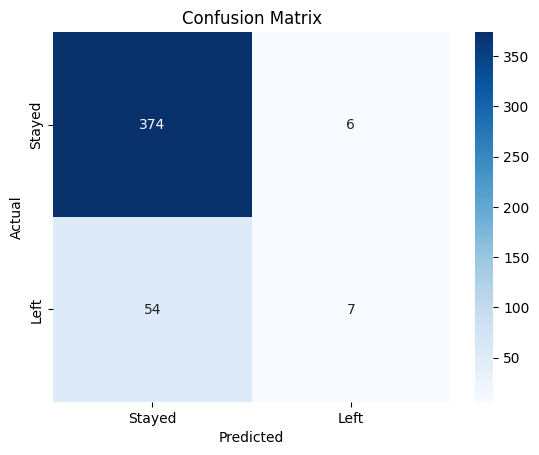

              precision    recall  f1-score   support

           0       0.87      0.98      0.93       380
           1       0.54      0.11      0.19        61

    accuracy                           0.86       441
   macro avg       0.71      0.55      0.56       441
weighted avg       0.83      0.86      0.82       441



In [34]:
# Defining the features (independent variables) and the target (dependent variable)

X = data[['Age', 'BusinessTravel', 'DistanceFromHome', 'Education', 'JobSatisfaction', 'MonthlyIncome', 'JobRole', 'OverTime', 'WorkLifeBalance', 
          'MaritalStatus']]
Y = data['Attrition']

# Split data into training and testing data sets
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)

# Make Predictions
y_pred = logreg.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

## Explanation of Logistic Regression Results
From the logistic regression results, we can observe a few important components: <br>
(1) The confusion Matrix <br>
(2) Accuracy <br>
(3) The classification report <br>


### 1. The confusion Matrix
- A confusion matrix is a table used to evaluate the performance of a classification model by comparing its predictions with the actual outcomes.
- It provides insights into where the model performs well and where it makes errors. The matrix is divided into four key components:
    True Positive (TP): Correctly predicted positive cases <br> 
    True Negative (TN): Correctly predicted negative cases <br> 
    False Positive (FP): Incorrectly predicted positive cases (Type I error) <br> 
    False Negative (FN): Incorrectly predicted negative cases (Type II error) <br>
- In our anaysis, the confusion matrix shows the count of correct and incorrect predictions based on the employee decision to stay or to leave
- Matrix interpretation:

    TP: 7 employees were predicted **to leave** and **they did leave** <br>
    TN: 374 employees were predicted **to stay** and **they did stay** <br>
    FP: 6 employees were predicted **to leave** and **they stayed** <br>  (Type I error)
    FN: 54 employees were predicted **to stay** and **they left** <br> (Type II error) 
  
### 2. Accuracy: 86.39%
- Accuracy measures the proportion of correct predictions out of all predictions
- This explains that, the logistic model was able to correctly predict whether employees left or stayed with the company about 86.39% of the time.
- Accuracy is measured as:
- Accuracy = (TP + TN) / (TP + TN + FP + FN) <br>
      Note the denominator is the Total Predictions  <br> 

### 2. The Classification report
Metrices from the classification report helps evaluate the model performance
- **Precision:** Out of all instances the model predicted as a particular class, precision is the fraction that truly belong to that class <br>
        - For Stayed (class 0) precision is 0.87. The model is correct 87% of the time <br>
        - For Left (Class 1) precision is 0.54. The model is correct 54% of the time <br> 
- **Recall:** Out of all real instances of a class, recall is the fraction the model correctly identified <br>
        - For Stayed (class 0) recall is 0.98. The model found only 98% of all true "Stayed" cases <br>
        - For Left (Class 1) recall is 0.11. the model found only 11% of all true "Left" cases <br>
- **F1-Score:** F1 score is the harmonic mean of precision and recall, which balances both metrics in one value  <br>
        - For Stayed (class 0) F1-score  is 0.93, suggesting a good balance between precision and recall <br>
        - For Left (Class 1) F1-score is 0.19. suggesting poor perfomance in identifying the employees who left <br>
- **Support:** Support indicates the number of actual occurences of each class in our test dataset  <br>
        - For Stayed (class 0) 380 instances <br>
        - For Left (Class 1) 61 instances <br>
        - Indicating that there are significantly more employees who stayed than who left, which influences the model performance  <br>
- **Macro Average:** The arithmetic mean of the metrices (precision, recall, or F1-score) calculated for each class, **treating all classes equally**.
  $$
  \text{Macro avg} = \frac{\text{Score for Stayed} + \text{Score for Left}}{\text{Number of classes}}
  $$
        Macro average gives **equal weight** to each class, regardless of how many samples are in that class. It’s useful if you care about the performance on all classes equally, especially when classes are imbalanced.

- **Weighted Average:** The mean of the metric, weighted by the number of true instances (support) for each class.
  $$
  \text{Weighted avg} = \frac{(\text{Score for Stayed} \times \text{support}_stayed) + (\text{Score for Left} \times \text{support}_left)}{\text{Total support}}
  $$
        Weighted average gives more importance to classes with **more true samples**. This metric tells you the “overall” model performance, but if one class is much more common than others, the weighted average will mostly reflect the model’s performance on that common class. <br>

        In our results: <br>
            - Macro avg looks at the simple average across classes <br>
            - Weighted avg reflects the actual class distribution in our dataset  <br>

  

## Summary  
- The model achieved a strong overall **accuracy of 86%**, correctly classifying most of the employees’ attrition status
- The confusion matrix shows very high correct predictions for employees who stayed, but poor identification of those who left (only 7 out of 61 'left' employees predicted correctly, with many false negatives)
- **Precision and recall for the "Left" class are low** (0.54 and 0.11), indicating the model struggles to identify employees who will leave
- Macro average metrics are significantly lower than weighted average metrics, showing model performance is much better for the majority "Stayed" class than for the minority "Left" class
- The model is reliable for predicting who will stay, but not effective for identifying employees likely to leave, which highlights a class imbalance challenge

## Explanation of Each Coefficient:

In [35]:
# Get the coefficients and the corresponding feature name
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': logreg.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

            Feature  Coefficient
7          OverTime     1.500837
9     MaritalStatus     1.110996
3         Education     0.084599
6           JobRole     0.067426
1    BusinessTravel     0.035709
2  DistanceFromHome     0.026022
5     MonthlyIncome    -0.000100
0               Age    -0.032190
8   WorkLifeBalance    -0.234517
4   JobSatisfaction    -0.331763


The logistic regression coefficients show how each feature influences the probability of predicting the "Left" class (employee attrition):

- **Positive coefficients (e.g., OverTime: 1.50, MaritalStatus: 1.11)**: Higher values in these features increase the probability of attrition. For example, working overtime or being single makes attrition more likely.
- **Negative coefficients (e.g., JobSatisfaction: -0.33, WorkLifeBalance: -0.23, Age: -0.03)**: Higher values in these features decrease the probability of attrition. Higher job satisfaction, better work-life balance, and older age are associated with a lower likelihood of leaving.
- **Coefficients near zero (e.g., MonthlyIncome, DistanceFromHome, Education)**: These variables have little effect on predicting attrition, all else being equal.

Larger absolute values (either positive or negative) indicate a stronger influence on the model's decision, while values close to zero indicate weaker or negligible effect.

## Next Steps

- **Address class imbalance** by applying techniques such as SMOTE, random oversampling/undersampling, or adjusting class weights to improve detection of employees who leave.
- **Feature engineering**: Create additional meaningful features or interaction terms, and consider eliminating features with very low impact.
- **Model experimentation**: Try more sophisticated models like Random Forest, Gradient Boosting, or XGBoost, which may handle imbalance and nonlinearities better than logistic regression.
- **Evaluate with additional metrics**: Focus on metrics such as recall, F1-score, and ROC-AUC for the minority ("Left") class, not just overall accuracy.
- **Business actions**: Use the top positive and negative predictors (e.g., OverTime, Marital Status, Job Satisfaction) to recommend targeted retention strategies and interventions.